In [37]:
# Comments : RNN + LSTM 
# Basic structure of data 
# objective : TS 
#Approach : subtracted the in_flow and out flow to get the number of count of the people and then predicted.

In [403]:
#importing libraries and read the csv file
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('data.csv',usecols=[0,1,2,3,4])
dataset.head()

,flowid,date,time,count,event_flag
0,7.0,7/24/2005,0:00:00,0.0,0
1,9.0,7/24/2005,0:00:00,0.0,0
2,7.0,7/24/2005,0:30:00,1.0,0
3,9.0,7/24/2005,0:30:00,0.0,0
4,7.0,7/24/2005,1:00:00,0.0,0


In [404]:
#merge the data and time columns 
date_time = pd.to_datetime(dataset['date'] + ' ' + dataset['time'])

In [405]:
#drop the date_time col from the existing data frame 
new=dataset.drop(['date','time'],axis=1)

In [406]:
# concat both the data frame (date_time and new_train)
cali_data=pd.concat([date_time,new],axis=1)
cali_data.columns = ['datetime','flowid', 'count','event']
cali_data.head()

,datetime,flowid,count,event
0,2005-07-24 00:00:00,7.0,0.0,0
1,2005-07-24 00:00:00,9.0,0.0,0
2,2005-07-24 00:30:00,7.0,1.0,0
3,2005-07-24 00:30:00,9.0,0.0,0
4,2005-07-24 01:00:00,7.0,0.0,0


In [407]:
## separate inflow and outflow dataframe based on the flowid count
out_flow = cali_data.loc[cali_data['flowid'] == 7]

in_flow = cali_data.loc[cali_data['flowid'] == 9]

In [408]:
out_flow.head()

,datetime,flowid,count,event
0,2005-07-24 00:00:00,7.0,0.0,0
2,2005-07-24 00:30:00,7.0,1.0,0
4,2005-07-24 01:00:00,7.0,0.0,0
6,2005-07-24 01:30:00,7.0,0.0,0
8,2005-07-24 02:00:00,7.0,0.0,0


In [409]:
out_flow.set_index('datetime', inplace=True)
in_flow.set_index('datetime', inplace=True)


In [410]:
# add the colums and drop the existing columns 
out_flow.drop('flowid', axis=1, inplace=True)
in_flow.drop('flowid', axis=1, inplace=True)

C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [411]:
#subract inflow and outflow to find the people count 
new_data=out_flow.subtract(in_flow)

In [412]:
#check the dataframe
new_data.head()

,count,event
datetime,,
2005-07-24 00:00:00,0.0,0
2005-07-24 00:30:00,1.0,0
2005-07-24 01:00:00,0.0,0
2005-07-24 01:30:00,0.0,0
2005-07-24 02:00:00,0.0,0


In [413]:
#new_data.to_csv('new_data.csv')

In [414]:
# import all the libraries to be used 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [415]:
#check the shape of the dataset
new_data.shape

(5040, 2)

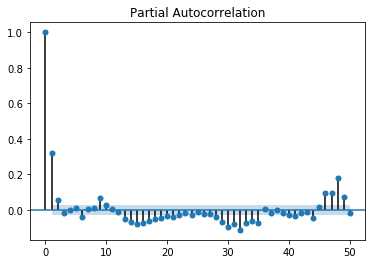

In [416]:
#plot pacf graph using stats model
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new_data['count'], lags=50)

#plt.show()

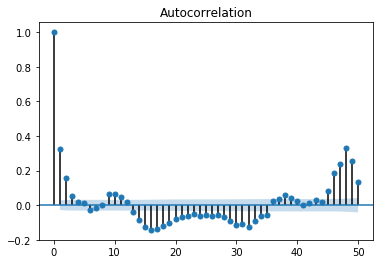

In [417]:
# plot acf model
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(new_data['count'],lags= 50)
#plt.show()

In [418]:
#store the editted df to new dataframe
final_data=new_data

In [419]:
# fix random seed for reproducibility
np.random.seed(7)
new_data = new_data.values
# split into train and test sets
train_size = int(len(new_data) * 0.67)
test_size = len(new_data) - train_size
train, test = new_data[0:train_size,:], new_data[train_size:len(new_data),:]
print("train", "test")
train.shape
test.shape

train test


(1664, 2)

In [420]:
print(train)

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  0.]
 ..., 
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [421]:
# convert an array of values into a dataset matrix 
def create_dataset(new_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(new_data)-look_back-1):
        a = new_data[i:(i+look_back), 0:2]
        dataX.append(a)
        dataY.append(new_data[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [440]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, look_back, features]
print("train: ", trainX.shape)
print("test: ", testX.shape)

train:  (3372, 3, 2)
test:  (1660, 3, 2)


In [469]:
testY.shape
testX[1659,]

array([[ 0.,  0.],
       [ 3.,  0.],
       [ 0.,  0.]])

In [441]:
#check the data
train

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  0.],
       ..., 
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [442]:
# simple rnn model 
from keras.layers import SimpleRNN
model=Sequential()
model.add(SimpleRNN(50,input_shape=(3,2))) 
#mode
model.add(Dense(1))
model.summary()

#compile 
model.compile(loss='mse', optimizer='adam')

#fit the model on train data 
model.fit(np.array(trainX),np.array(trainY),nb_epoch=20)
          


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 50)                2650      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
3372/3372 [==============================] - 3s - loss: 18.7889     
Epoch 2/20
3372/3372 [==============================] - 0s - loss: 18.3104     
Epoch 3/20
3372/3372 [==============================] - 0s - loss: 18.2066     
Epoch 4/20
3372/3372 [==============================] - 0s - loss: 18.0195     
Epoch 5/20
3372/3372 [==============================] - 0s - loss: 18.0276     
Epoch 6/20
3372/3372 [==============================] - 0s - loss: 17.9525     
Epoch 7/20
3372/3372 [==============================] - 0s - loss: 17.9066     
Epoch 8/20
3372/3372 [==============================] - 0s - loss: 17.8214     
Epoch 9/20
3372/3372 [==============================] - 0s - loss: 17.7602     
Epoch 10/20
3372/3372 [==============================] - 0s - loss: 17.7463     
Epoch 11/20
3372/3372 [==============================] - 0s - loss: 17.6992     
Epoch 12/20
3372/3372 [==============================] - 0s - loss: 17.6385     
Epoch 13/20
3372/3372 [==============

In [443]:
#predict on the validation data set
predic=model.predict(np.array(testX))
print(predic)

[[ 0.04403269]
 [ 0.04403269]
 [ 0.04403269]
 ..., 
 [ 0.66370761]
 [ 0.4640941 ]
 [-0.14573631]]


In [444]:
#evaluate the model on validaion to check the scores 
model.evaluate(testX,np.array(testY))

 992/1660 [================>.............] - ETA: 0s 

25.023790340825737

# LSTM (Long Short Term Memory) Model

In [179]:
#lstm model
model_lstm=Sequential()
model_lstm.add(LSTM(150,input_shape=(3,2))) 
#model.add(Dropout=(0.5))
model_lstm.add(Dense(1))
model_lstm.summary()

#compile
model_lstm.compile(loss='mse', optimizer='adam')

# fit the model on train data 
model_lstm.fit(np.array(trainX),np.array(trainY),nb_epoch=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91800     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 151       
Total params: 91,951
Trainable params: 91,951
Non-trainable params: 0
_________________________________________________________________


C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
3373/3373 [==============================] - 5s - loss: 19.1119     
Epoch 2/50
3373/3373 [==============================] - 1s - loss: 18.3744     
Epoch 3/50
3373/3373 [==============================] - 0s - loss: 18.1719     
Epoch 4/50
3373/3373 [==============================] - 0s - loss: 18.1177     
Epoch 5/50
3373/3373 [==============================] - 0s - loss: 18.0616     
Epoch 6/50
3373/3373 [==============================] - 0s - loss: 18.0713     
Epoch 7/50
3373/3373 [==============================] - 0s - loss: 18.0067     
Epoch 8/50
3373/3373 [==============================] - 0s - loss: 18.0137     
Epoch 9/50
3373/3373 [==============================] - 0s - loss: 18.0250     
Epoch 10/50
3373/3373 [==============================] - 0s - loss: 17.9313     
Epoch 11/50
3373/3373 [==============================] - 0s - loss: 17.9224     
Epoch 12/50
3373/3373 [==============================] - 1s - loss: 17.9441     
Epoch 13/50
3373/3373 [==============

In [445]:
#predict ton test data
model.predict(testX)

array([[ 0.04403269],
       [ 0.04403269],
       [ 0.04403269],
       ..., 
       [ 0.66370761],
       [ 0.4640941 ],
       [-0.14573631]], dtype=float32)

In [180]:
#evaluate the model
model_lstm.evaluate(testX,testY)

1536/1661 [==========================>...] - ETA: 0s

25.174105672646832

In [433]:
from numpy import newaxis

In [508]:
# fucntionn to predict n time stampes  for simmple rnn model
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[1:], 2, [predicted[-1],0], axis=0)
#         print(curr_frame)
    
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

In [473]:
testX.shape[0]
last_val = testX[testX.shape[0]-1,]
# print(last_val)

[[ 0.  0.]
 [ 3.  0.]
 [ 0.  0.]]


In [509]:
#using simple rnn model
#call the function and find the number of next perdiction value 
predict_length=5
predictions = predict_sequences_multiple(model, last_val, predict_length)
print(predictions)


[[-0.22716914]]
[[ 1.06582248]]
[[ 0.49427736]]
[[ 0.2357195]]
[[ 0.5919854]]
[-0.22716914, 1.0658225, 0.49427736, 0.2357195, 0.5919854]


In [512]:
# write the prediction to csv file using rnn model
predictions=pd.DataFrame(predictions)
predictions.to_csv('prediction_lstm.csv')

In [514]:
#prediction based on the lstm model
predict_length=5
predictions_lstm = predict_sequences_multiple(model_lstm, last_val, predict_length)
print(predictions_lstm)

[[ 0.52287972]]
[[ 1.02341139]]
[[ 0.46402636]]
[[ 0.4548398]]
[[ 0.4511165]]
[0.52287972, 1.0234114, 0.46402636, 0.4548398, 0.4511165]


In [516]:
# write to csv file the predictions using lstm model
predictions_lstm=pd.DataFrame(predictions_lstm)
predictions_lstm.to_csv('prediction_lstm,csv')